In [1]:
import librosa
import numpy as np

In [15]:
# Chargement de la piste audio
filename = 'guitar_track.wav'
y, sr = librosa.load(filename)

In [18]:
# TEST Chargement de la piste audio TEST
filename_2 = '00_BN1-129-Eb_solo_mix.wav'
y_2, sr_2 = librosa.load(filename_2)

In [19]:
y_2.shape


(492253,)

In [16]:
y.shape

(492253,)

In [17]:
sr



22050

In [6]:
# Calcul de la CQT (transformation constant-Q)
cqt = librosa.cqt(y, sr=sr)
cqt.shape


(84, 962)

In [20]:
#TEST 
cqt_2 = librosa.cqt(y_2, sr=sr_2)
cqt_2.shape

(84, 962)

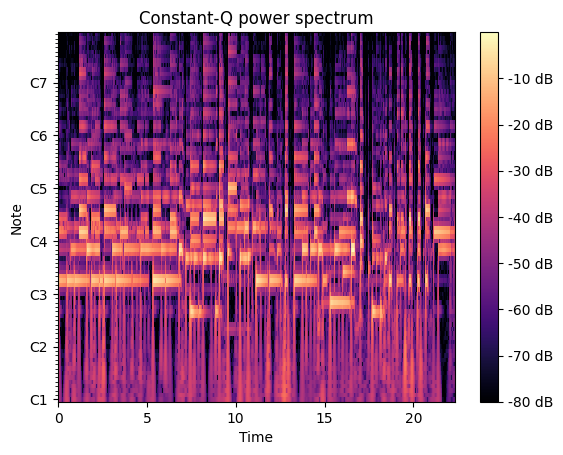

In [26]:
# TEST pour image
from matplotlib import pyplot as plt
import librosa.display

fig, ax = plt.subplots()
C = np.abs(librosa.cqt(y, sr=sr))
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [28]:
# Détermination des fréquences pour chaque corde de guitare
f_strings = [82.41, 110, 146.83, 196, 246.94, 329.63] # CORDE A VIDE

# A FAIRE: DES BONS F STRINGS POUR DISSOCIER LES CORDES --> Intervalles



In [57]:
min(cqt.flatten())

(-0.58738846+0.039680045j)

In [60]:
# Conversion des fréquences en bins de la CQT
string_bins = [np.argmin(np.abs(librosa.cqt_frequencies(cqt.shape[0], fmin = 82.41) - f)) for f in f_strings]

In [61]:
string_bins 

[0, 5, 10, 15, 19, 24]

In [43]:
# Sélection des sous-bandes pour chaque corde de guitare
guitar_strings = [cqt[string_bin-1:string_bin+2, :] for string_bin in string_bins]


In [50]:
# Sauvegarde des pistes séparées en utilisant la fonction istft (inverse short-time Fourier transform)
import soundfile as sf
for i, string in enumerate(guitar_strings):
    separated_string = librosa.istft(string)
    sf.write("guitar_string_{}.wav".format(i), samplerate=sr, data = separated_string)